In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np



# URL of the webpage containing the table
url = 'https://www.screener.in/screens/599148/companies-by-market-cap/?limit=50&page='

# Read the HTML table into a list of DataFrame objects
tables = pd.read_html(url)

# Assuming the table you want to scrape is the first table on the page

table = pd.read_html(url + str(1))
df = table[0]

for i in range(2, 11):
  table = pd.read_html(url + str(i))
  new_df = table[0]
  df = pd.concat([df, new_df], ignore_index=True)




In [3]:

#Cleaning the data

# Deleting unnecessary details
df.drop([15, 26, 42, 53, 69, 80, 96, 107,123,134,150,161,177,188,204,215,231,242,258,269], inplace=True)

# Define the columns to keep
columns_to_keep = ['Name','Mar Cap  Rs.Cr.','P/E', 'Div Yld  %', 'CMP  Rs.', 'ROCE  %' ]

# Create a new DataFrame with only the desired columns
df = df[columns_to_keep]



In [4]:
df=df.rename(columns={'Mar Cap  Rs.Cr.': 'Mar Cap', 'Div Yld  %': 'Div%', 'ROCE  %': 'ROCE','CMP  Rs.': 'CMP'})
df.head()

,Name,Mar Cap,P/E,Div%,CMP,ROCE
0,Reliance Industr,1965500.43,28.23,0.31,2905.10,10.02
1,TCS,1382597.87,29.67,1.26,3821.35,64.28
2,HDFC Bank,1146981.57,17.90,1.29,1509.80,9.50
3,Bharti Airtel,788686.45,69.16,0.30,1326.00,12.30
4,ICICI Bank,778277.08,18.34,0.72,1107.90,6.32


In [5]:

# Saving the data frame into a new csv file for analysis
df.to_csv('df.csv', index=False)

# Read the CSV file back into a DataFrame
df = pd.read_csv('df.csv')

# To see what kind of analysis and charts are possible
df.describe()


,Mar Cap,P/E,Div%,CMP,ROCE
count,2.500000e+02,242.000000,250.000000,250.000000,249.000000
mean,1.325509e+05,62.687355,0.977520,3172.209080,19.406747
std,2.009857e+05,125.610261,2.113858,9605.016799,19.250451
min,2.858407e+04,4.120000,0.000000,14.000000,-11.400000
25%,4.230166e+04,22.820000,0.202500,446.612500,8.810000
50%,6.964246e+04,41.325000,0.460000,1130.800000,14.200000
75%,1.263758e+05,71.812500,1.182500,2852.400000,24.440000
max,1.965500e+06,1832.070000,25.600000,130237.750000,152.520000


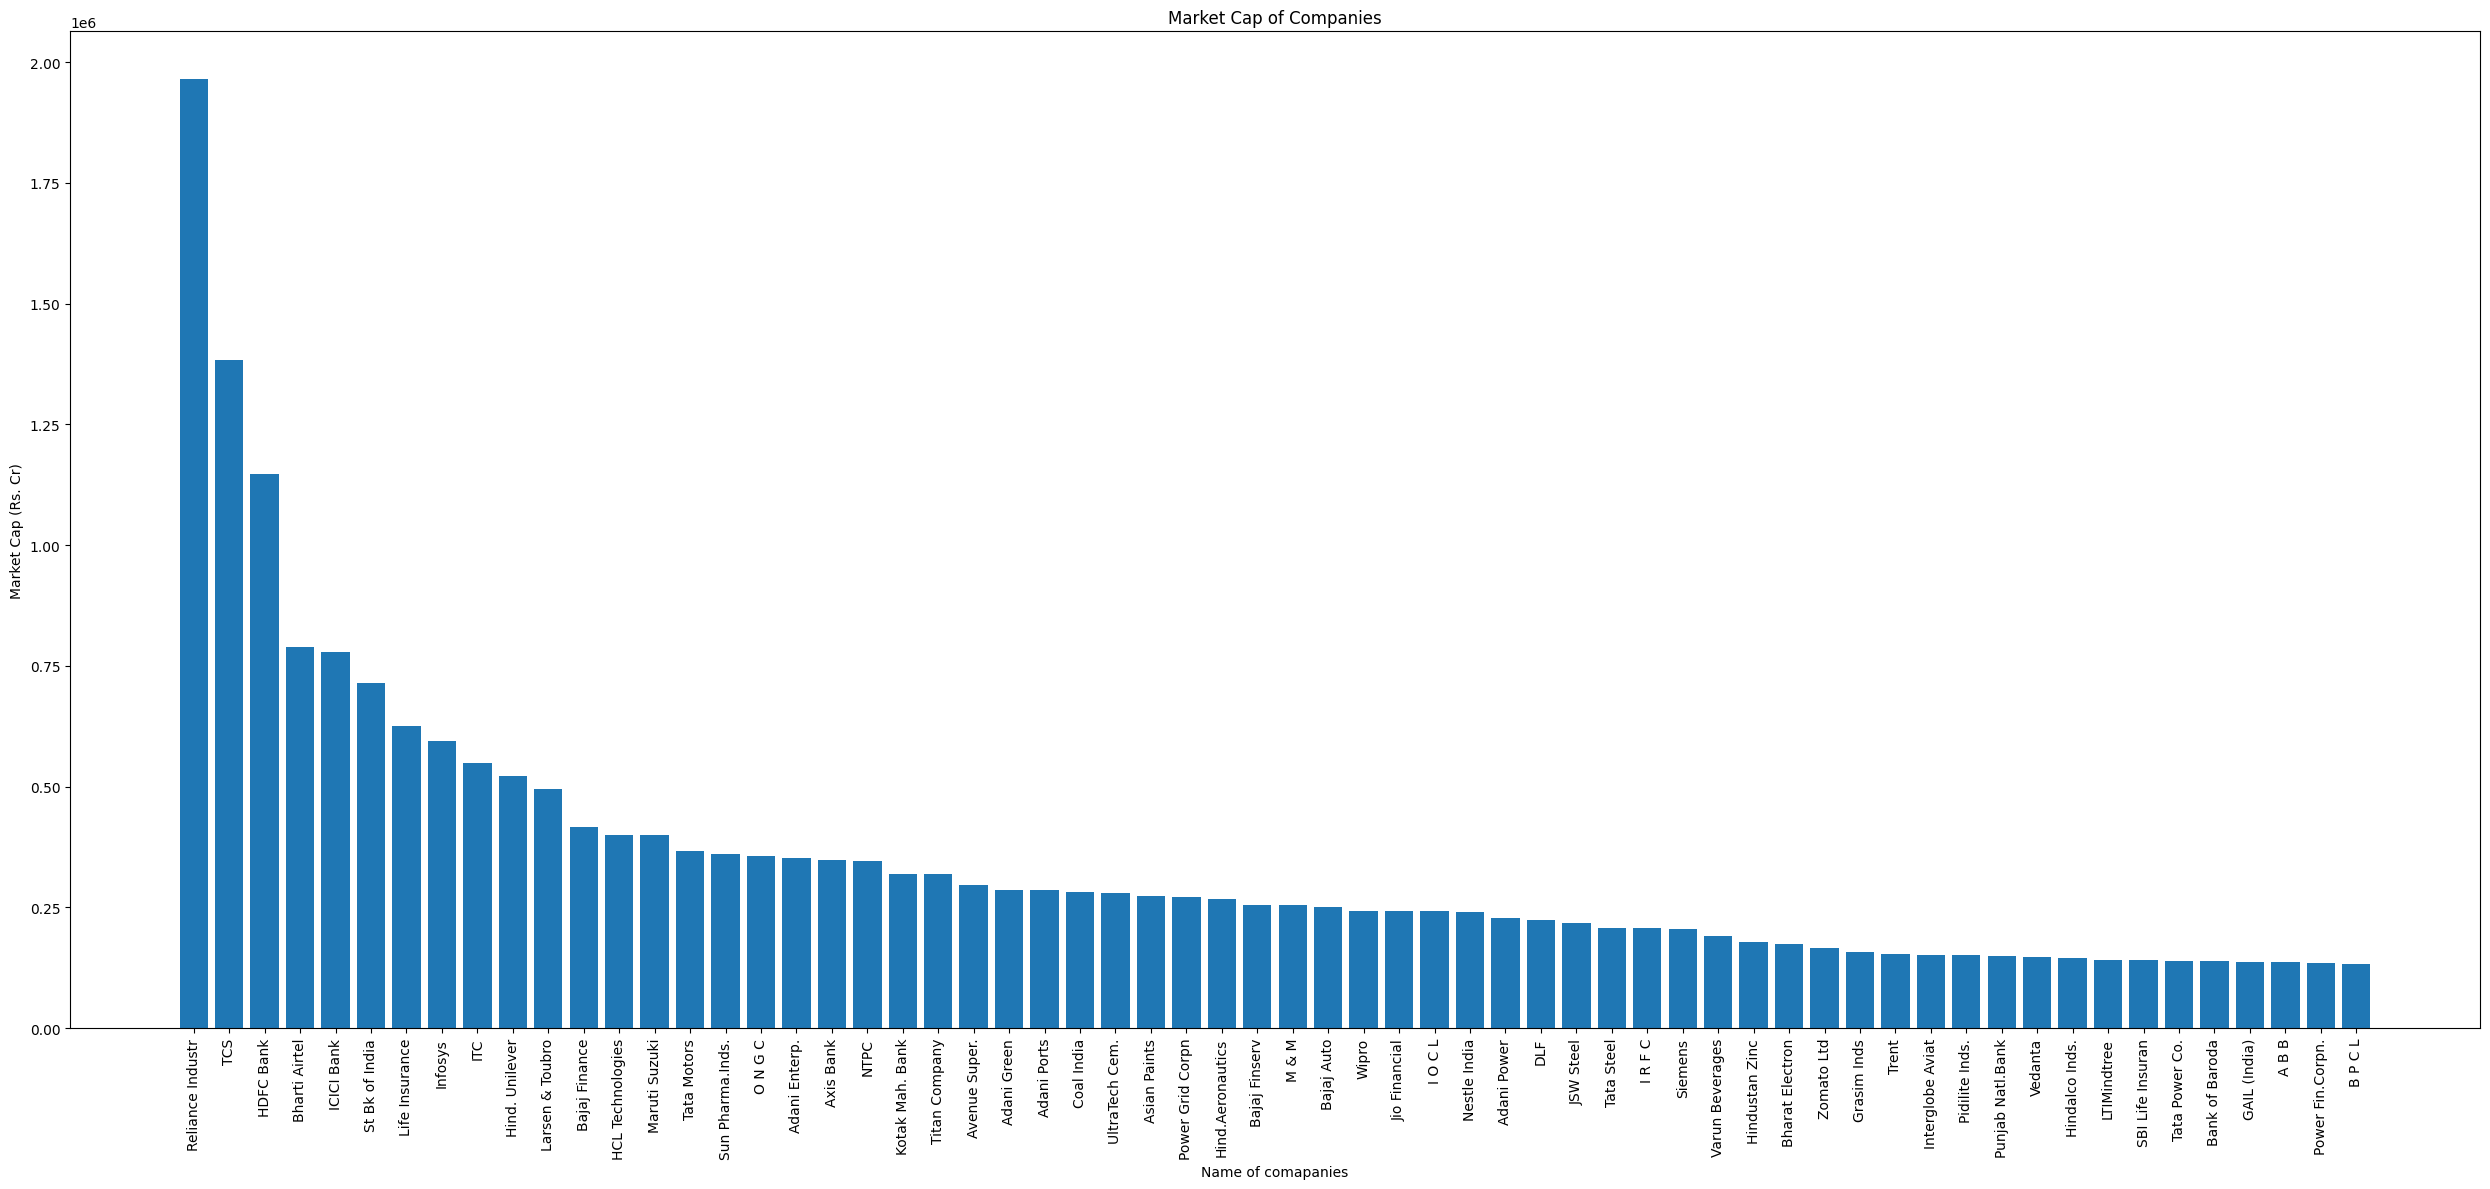

In [6]:
# only very large companies
ultra_large_cap = df[df["Mar Cap"] > 130000]

plt.figure(figsize=(25, 12))
plt.bar(ultra_large_cap['Name'], ultra_large_cap['Mar Cap'])
plt.xlabel('Name of comapanies')
plt.ylabel('Market Cap (Rs. Cr)')
plt.title('Market Cap of Companies')
plt.xticks(rotation=90)  # positioning labels for readability
plt.tight_layout()
plt.show()


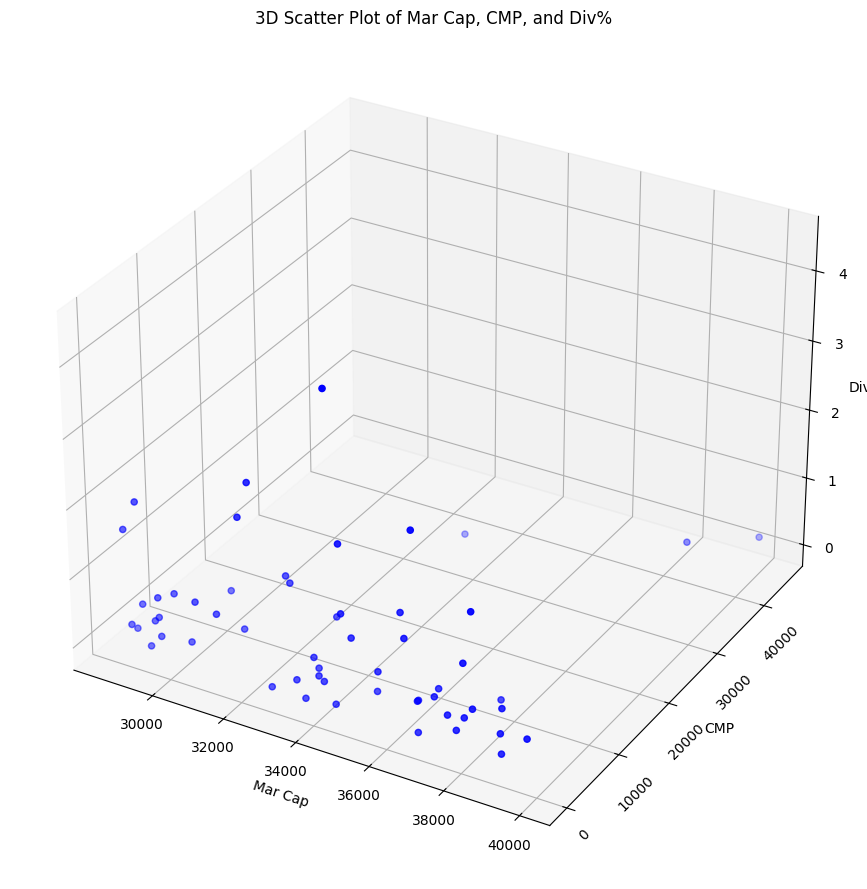

In [33]:
mid_cap= df[(df['Mar Cap'] <=100000) & (df['Mar Cap']>60000)]
low_cap= df[df['Mar Cap']<= 40000]
fig = plt.figure(figsize=(25,11))
ax = fig.add_subplot(projection='3d') # creating an object ax with 3 axes



ax.scatter(low_cap['Mar Cap'], low_cap['CMP'], low_cap['Div%'], color = 'blue', marker='o') # plotting points in the ax object

# setting labels for axes
ax.set_xlabel('Mar Cap ')
ax.set_ylabel('CMP')
ax.set_zlabel('Div%')
ax.set_title('3D Scatter Plot of Mar Cap, CMP, and Div%')
plt.yticks(rotation=45)

ax.grid(True)
plt.show()
#  from the graph there is no positive correlation seen b/w Mar cap and CMP, current market price, there does not seem to be any correlation b/w
# CMP and div% too, and neither b/w mar cap and div%.

In [40]:
var = ['Mar Cap', 'P/E', 'Div%', 'CMP']

#  correlation matrix
corr_m = df[var].corr()

# Print the correlation matrix
print(corr_m)


          Mar Cap       P/E      Div%       CMP
Mar Cap  1.000000 -0.077179  0.053562 -0.034677
P/E     -0.077179  1.000000 -0.110176 -0.001497
Div%     0.053562 -0.110176  1.000000 -0.060206
CMP     -0.034677 -0.001497 -0.060206  1.000000


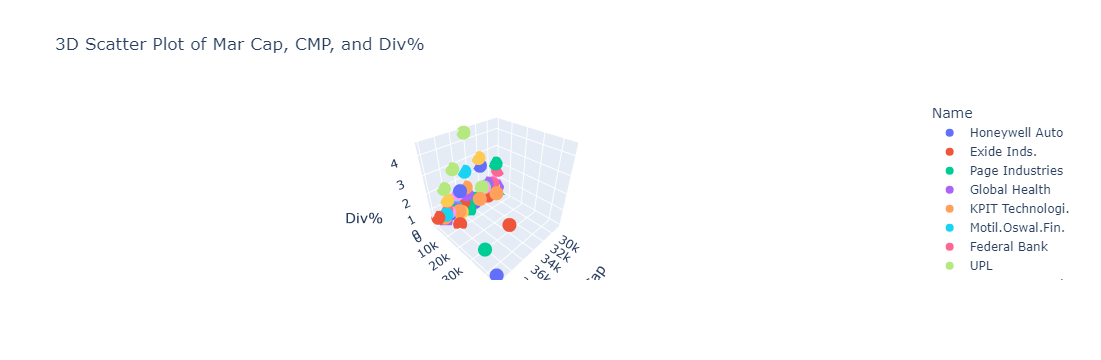

In [39]:
import plotly.express as px

#  3D scatter plot using plotly.express
fig = px.scatter_3d(low_cap, x='Mar Cap', y='CMP', z='Div%', color='Name', size_max=5,
                    labels={'Mar Cap': 'Mar Cap', 'CMP': 'CMP', 'Div%': 'Div%'},
                    title='3D Scatter Plot of Mar Cap, CMP, and Div%',
                    hover_name='Name')

fig.show()
# The plot is interactive, it can be tilted along its axis, zoomed in and displays information 
# when cursor touches any point on the plot.
# same conclusion as above graph

In [42]:
x = df['Div%'] 
y = df['CMP'] 
## fit a OLS model with intercept on TV and Radio 
x = sm.add_constant(x) 
est = sm.OLS(y, x).fit() 
est.summary()

# from the summary it is clear that only 0.4% of variation in y is explained by x(r squared), surprisingly there is a negative relation b/w div% and CMP; with a 
# 1% increase in div% there is a decrease in CMP by 273.56 rupees(obviously the results are not trustworthy since the dataset is not comprehensive, it 
# is not a timeseries, neither the model have been checked for assumptions of the CLRM(classical linear regression model))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMP   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9022
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.343
Time:                        12:50:34   Log-Likelihood:                -2646.3
No. Observations:                 250   AIC:                             5297.
Df Residuals:                     248   BIC:                             5304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3439.6237    669.651      5.136      0.000    2120.695    4758.552
Div%        -273.5644    288.010     -0.950      0.343    -840.822     293.694
==============================================================================
Omnibus:                      453.458   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162182.886
Skew:                          10.067   Prob(JB):                         0.00
Kurtosis:                     126.143   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
x = df['Mar Cap'] 
y = df['CMP'] 
## fit a OLS model with intercept on TV and Radio 
x = sm.add_constant(x) 
est = sm.OLS(y, x).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMP   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2986
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.585
Time:                        12:57:17   Log-Likelihood:                -2646.6
No. Observations:                 250   AIC:                             5297.
Df Residuals:                     248   BIC:                             5304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3391.8722    729.160      4.652      0.000    1955.737    4828.007
Mar Cap       -0.0017      0.003     -0.546      0.585      -0.008       0.004
==============================================================================
Omnibus:                      453.105   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161625.117
Skew:                          10.052   Prob(JB):                         0.00
Kurtosis:                     125.930   Cond. No.                     2.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# apart from the problems stated in the graph above about the model, if this model was actually true, tehn the results would have been:
# with a increase in mar cap by 10000 rupees there would be decrease in cmp by 17; only 0.1% variation in cmp is explained by mar cap.

In [45]:
# scraping using beatuiful soup
from bs4 import BeautifulSoup
import pandas as pd
import requests

url='https://www.screener.in/screens/599148/companies-by-market-cap/?limit=50&page=1'
page= requests.get(url)
soup=BeautifulSoup(page.text, 'html') # parsing the html content of url into object soup

table=soup.find_all('table')[0]  # find_all finds all the tags with <table> and creates a list of them , we need the very first table hence 0 index
print(table)

<table class="data-table text-nowrap striped mark-visited">
<tbody>
<tr>
<th class="text" scope="colgroup">
<a aria-label="Default Sort" class="" href="?limit=50&amp;order=asc">S.No.</a>
</th>
<th class="text" scope="colgroup">
<a aria-label="Sort on Name" class="" href="?limit=50&amp;sort=name&amp;order=desc">Name</a>
</th>
<th data-tooltip="Current Price" scope="colgroup">
<a aria-label="Sort on Current Price" class="" href="?limit=50&amp;sort=current+price&amp;order=desc">
                    CMP
                    <span style="color: hsl(0, 0%, 45%)">Rs.</span>
</a>
</th>
<th data-tooltip="Price to Earning" scope="colgroup">
<a aria-label="Sort on Price to Earning" class="" href="?limit=50&amp;sort=price+to+earning&amp;order=desc">
                    P/E
                    <span style="color: hsl(0, 0%, 45%)"></span>
</a>
</th>
<th data-tooltip="Market Capitalization" scope="colgroup">
<a aria-label="Sort on Market Capitalization" class="desc" href="?limit=50&amp;sort=market+cap

In [46]:
title=table.find_all('th')[0:11]  # from the above table find all the <th> or the headings(th) and storing them in title
title=[i.text.strip().replace('\n', '') for i in title] # cleaing all the other stuff apart from the heading text, also deleting '/n' contained in headings
print(title)
df=pd.DataFrame(columns=title) 

['S.No.', 'Name', 'CMP                    Rs.', 'P/E', 'Mar Cap                    Rs.Cr.', 'Div Yld                    %', 'NP Qtr                    Rs.Cr.', 'Qtr Profit Var                    %', 'Sales Qtr                    Rs.Cr.', 'Qtr Sales Var                    %', 'ROCE                    %']


In [47]:
rows= table.find_all('tr')[1:] # finds_all creates a list of all <tr> or rows, we are starting from 1 since first row(0th index) is the headings row
for row in rows:
  row_data=row.find_all('td') # for each row list find all the <td> or data in them and store them in a list
  ind_row_data=[data.text.strip() for data in row_data] # cleaning the individual data points of html stuff
  if(ind_row_data==[]):   
      continue                  # leaving out null rows
  df.loc[len(df)]= ind_row_data   # enters the cleaned rows of data into df.

In [48]:
print(df)

   S.No.              Name CMP                    Rs.     P/E  \
0     1.  Reliance Industr                    2905.10   28.23   
1     2.               TCS                    3821.35   29.67   
2     3.         HDFC Bank                    1509.80   17.90   
3     4.     Bharti Airtel                    1326.00   69.16   
4     5.        ICICI Bank                    1107.90   18.34   
5     6.    St Bk of India                     801.30   10.39   
6     7.    Life Insurance                     988.05   15.49   
7     8.           Infosys                    1430.25   22.81   
8     9.               ITC                     440.00   26.84   
9    10.    Hind. Unilever                    2222.65   50.84   
10   11.   Larsen & Toubro                    3605.20   39.18   
11   12.     Bajaj Finance                    6731.20   28.83   
12   13.  HCL Technologies                    1473.85   25.47   
13   14.     Maruti Suzuki                   12703.35   29.61   
14   15.       Tata Motor